### 参考リンク
- 参考記事
  - https://www.codexa.net/kaggle-titanic-beginner/

- データセット
  - https://www.kaggle.com/c/titanic

In [1]:
# データ分析の流れ
# csvを読み込む(データセットは、kaggleなどのサイトからダウンロードできる)
# 概形を確認する
# 欠損値を埋める(自分のセンスで埋めて良い)
# カテゴリデータを数値に変換する
# モデルに学習させ、スコアを計算する

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 学習データの読み込み、概形の確認

In [36]:
# No.1
df = pd.read_csv("train.csv")
display(df)#.head())
print(df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


(891, 12)


### 説明変数の意味
- PassengerId – 乗客識別ユニークID
- Survived – 生存フラグ（0=死亡、1=生存）
- Pclass – チケットクラス
- Name – 乗客の名前
- Sex – 性別（male=男性、female＝女性）
- Age – 年齢
- SibSp – タイタニックに同乗している兄弟/配偶者の数
- parch – タイタニックに同乗している親/子供の数
- ticket – チケット番号
- fare – 料金
- cabin – 客室番号
- Embarked – 出港地（タイタニックへ乗った港）

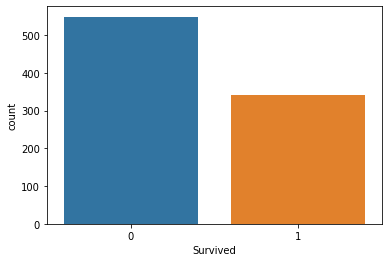

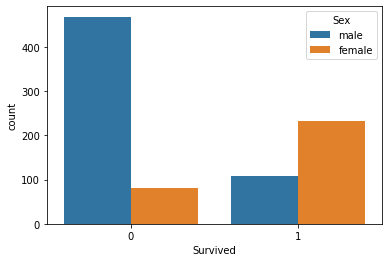

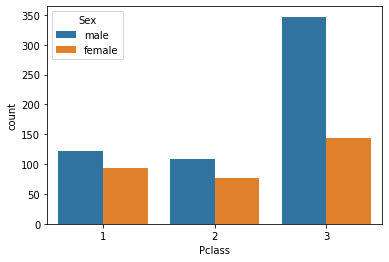

In [34]:
sns.countplot("Survived", data=df)
plt.show()
sns.countplot("Survived", hue="Sex", data=df)
plt.show()
sns.countplot("Pclass", hue="Sex", data=df)

### 欠損値の確認・欠損値を埋める

In [37]:
# No.2
# 欠損値の確認: 欠損値がある列を調べる
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# No.3
# Embarked(乗った港）を表示 -> Sが多い
# そこで欠損値(乗った港)が不明な人は Sとしておく
df["Embarked"].value_counts().sort_index()

C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [7]:
# No.4
df["Embarked"] = df["Embarked"].fillna("S")

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64


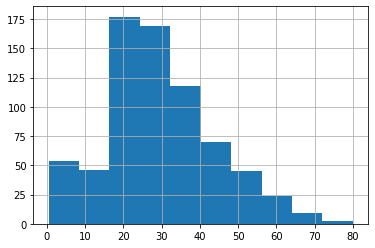

In [8]:
# No.5
print(df["Age"].value_counts().sort_index()) # 多すぎて表示できない
df["Age"].hist()  # ヒストグラムを書く
# ヒストグラムから、欠損している人の年齢を全体の"中央値"で埋めておく

In [38]:
# No.6
median = df["Age"].median() # median: 中央値　
df["Age"] = df["Age"].fillna(median)

In [39]:
# No.7
# 欠損値が埋まったことを確認する
# cabinは使わない
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### カテゴリデータ(文字列)を数値に変換する
- 文字列に対し、大小比較・数値計算ができないため

In [42]:
# No.8
# 今回は、Sex, Ticket, Embarked
print(df["Sex"].value_counts().sort_index())
# チケットは種類が多すぎるため、数値に変換せず、特徴量として使わない
print(df["Ticket"].value_counts())

print(df["Embarked"].value_counts().sort_index())

0    577
1    314
Name: Sex, dtype: int64
347082        7
CA. 2343      7
1601          7
347088        6
CA 2144       6
             ..
234818        1
C.A. 6212     1
392092        1
C.A. 31026    1
349246        1
Name: Ticket, Length: 681, dtype: int64
0.0     77
1.0    168
3.0    644
Name: Embarked, dtype: int64


In [41]:
# No.9
# Sex(性別)を数値に変換する
df["Sex"] = df["Sex"].map({"female":1, "male":0})
df["Embarked"] = df["Embarked"].map({"Q":0, "C":1, "S":3})

### モデルを使った予測

In [43]:
# No.10
# モデル（今回は決定木を読み込み)
from sklearn import tree
my_tree = tree.DecisionTreeClassifier()

### 目的変数、説明変数を定める

In [44]:
# No.11
y_label = "Survived"
x_label = ["Pclass", "Sex", "Age", "Fare"]

y_train = df[y_label].values
x_train = df[x_label].values

print(y_train.shape, x_train.shape)

(891,) (891, 4)


In [45]:
# No.12
my_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
# No.13
df[x_label].head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


### 生存者の予測

In [47]:
# No.14
y_pred = my_tree.predict(x_train)

In [50]:
# No.15
#[print(a,b) for a,b in zip(y_train, y_pred)];

def calc_score(y_train, y_pred):
    judge_list = []
    for a,b in zip(y_train, y_pred):
        if a == b:
            judge_list.append(1) # 正解の時
        else:
            judge_list.append(0) # 不正解の時

    print("Score:", judge_list.count(1)/len(judge_list))

In [51]:
# No.16
calc_score(y_train, y_pred)

Score: 0.9775533108866442


#### ランダムフォレストの場合
- https://qiita.com/mshinoda88/items/8bfe0b540b35437296bd#6-sklearn-モジュールで-ランダムフォレスト

In [20]:
# No.17
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
# No.18
# 特徴量の重要度を見る
feature_importance_list = clf.feature_importances_
[print(x_label,"\t", f"{imp:.2f}") for x_label, imp in zip(x_label, feature_importance_list)];

Pclass 	 0.20
Sex 	 0.59
Age 	 0.04
Fare 	 0.17


In [22]:
# No.19
y_pred2 = clf.predict(x_train)

In [23]:
# No.20
calc_score(y_train, y_pred2)
#[print(a,b) for a,b in zip(y_train, y_pred2)];

Score: 0.7789001122334456


# テストデータで評価する

In [24]:
# No.21
df_test = pd.read_csv("test.csv")
display(df_test.head())
print(df_test.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)


In [25]:
# No.22
df_test.isnull().sum()#head()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
# No.23
# 欠損値を埋める
df_test["Embarked"] = df_test["Embarked"].fillna("S")
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

median = df_test["Age"].median() # median: 中央値　
df_test["Age"] = df_test["Age"].fillna(median)

# Sex(性別)とEmbarked(入港地) を数値に変換する
df_test["Sex"] = df_test["Sex"].map({"female":1, "male":0})
df_test["Embarked"] = df_test["Embarked"].map({"Q":0, "C":1, "S":3})

# 説明変数と目的変数を抜き出す
##y_test = df_test["Survived"].values
x_test = df_test[["Pclass", "Sex", "Age", "Fare"]].values

print(x_test.shape)

(418, 4)


In [27]:
# No.24
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,3
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,3


In [28]:
# No.25
y_pred_test = my_tree.predict(x_test)
y_pred_test = clf.predict(x_test)

In [29]:
# No.26
df_pred = pd.DataFrame({"Survived": y_pred_test})
df_pred = pd.concat([df_test[["PassengerId"]], df_pred], axis=1)
df_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [30]:
# No.27
df_pred.to_csv("my_submission.csv", index=None)